In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# read the dataset
pd.set_option('display.max_columns',None)
df = pd.read_csv("C:/Users/User/Downloads/innercity.csv")
df.head()

cid        sold date   price  bed room  bathroom  home area  \
0  3034200666  20141107T000000  808100         4      3.25       3020   
1  8731981640  20141204T000000  277500         4      2.50       2550   
2  5104530220  20150420T000000  404000         3      2.50       2370   
3  6145600285  20140529T000000  300000         2      1.00        820   
4  8924100111  20150424T000000  699000         2      1.50       1400   

   lot area  tot floors  coast  sight  condition  quality  ceil area  \
0     13457         1.0      0      0          5        9       3020   
1      7500         1.0      0      0          3        8       1750   
2      4324         2.0      0      0          3        8       2370   
3      3844         1.0      0      0          4        6        820   
4      4050         1.0      0      0          4        8       1400   

   basement area  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1956             0    98133  47.7174 -122.336   
1            800      1976             0    98023  47.3165 -122.386   
2              0      2006             0    98038  47.3515 -121.999   
3              0      1916             0    98133  47.7049 -122.349   
4              0      1954             0    98115  47.6768 -122.269   

   living_measure15  lot_measure15  furnished  total_area  
0              2120           7553          1       16477  
1              2260           8800          0       10050  
2              2370           4348          0        6694  
3              1520           3844          0        4664  
4              1900           5940          0        5450

In [4]:
# read indexes
df.columns

Index(['cid', 'sold date', 'price', 'bed room', 'bathroom', 'home area',
       'lot area', 'tot floors', 'coast', 'sight', 'condition', 'quality',
       'ceil area', 'basement area', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [5]:
# overview of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   sold date         21613 non-null  object 
 2   price             21613 non-null  int64  
 3   bed room          21613 non-null  int64  
 4   bathroom          21613 non-null  float64
 5   home area         21613 non-null  int64  
 6   lot area          21613 non-null  int64  
 7   tot floors        21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil area         21613 non-null  int64  
 13  basement area     21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [6]:
# change timestamps in datetime
from datetime import datetime
df['sold date']= pd.to_datetime(df['sold date'])
df['sold yr'] = df['sold date'].dt.year

In [7]:
# dropping cid column
df1 = df.drop(['cid'],axis=1)

In [8]:
df1.describe()

price      bed room      bathroom     home area      lot area  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.401822e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.673622e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

         tot floors         coast         sight     condition       quality  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

          ceil area  basement area      yr_built  yr_renovated       zipcode  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258  98077.939805   
std      828.090978     442.575043     29.373411    401.679240     53.505026   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  living_measure15  lot_measure15  \
count  21613.000000  21613.000000      21613.000000   21613.000000   
mean      47.560053   -122.213896       1986.552492   12768.455652   
std        0.138564      0.140828        685.391304   27304.179631   
min       47.155900   -122.519000        399.000000     651.000000   
25%       47.471000   -122.328000       1490.000000    5100.000000   
50%       47.571800   -122.230000       1840.000000    7620.000000   
75%       47.678000   -122.125000       2360.000000   10083.000000   
max       47.777600   -121.315000       6210.000000  871200.000000   

          furnished    total_area       sold yr  
count  21613.000000  2.161300e+04  21613.000000  
mean       0.196687  1.718687e+04   2014.322954  
std        0.397503  4.158908e+04      0.467616  
min        0.000000  1.423000e+03   2014.000000  
25%        0.000000  7.035000e+03   2014.000000  
50%        0.000000  9.575000e+03   2014.000000  
75%        0.000000  1.300000e+04   2015.000000  
max        1.000000  1.652659e+06   2015.000000

In [9]:
# importing z-score for scaling
from scipy.stats import zscore

In [10]:
df_z = df1.drop(['sold date'],axis=1).apply(zscore) # scaling

In [11]:
# Find hidden pattern
# Clustering
# Evaluate intertia of clusters for elbow method
from scipy.spatial.distance import cdist 
clusters = range(1,11)
meanDistortions = []

In [12]:
from sklearn.cluster import KMeans # elbow method
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(df_z)
    prediction = model.predict(df_z)
    meanDistortions.append(sum(np.min(cdist(df_z,model.cluster_centers_,'euclidean'),axis=1))/df_z.shape[0])

Text(0.5, 1.0, 'Selectiong K with Elbow/Knee method')

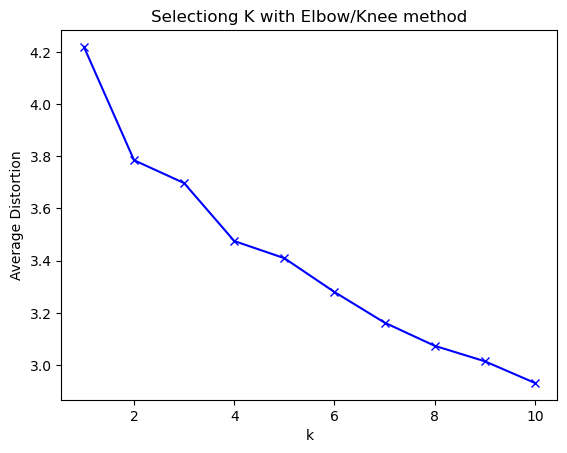

In [13]:
plt.plot(clusters,meanDistortions,'bx-') # plotting elbow method
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title("Selectiong K with Elbow/Knee method")

No clear Elbow point is seen. Hence,the dataset is not partitioned into clusters.

In [14]:
#final_model = KMeans(6)
#final_model.fit(df_z)
#prediction = final_model.predict(df_z)

# Exploratory Data Analysis


In [15]:
df1.columns

Index(['sold date', 'price', 'bed room', 'bathroom', 'home area', 'lot area',
       'tot floors', 'coast', 'sight', 'condition', 'quality', 'ceil area',
       'basement area', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area',
       'sold yr'],
      dtype='object')

###### Number of houses  corresponding to some features 

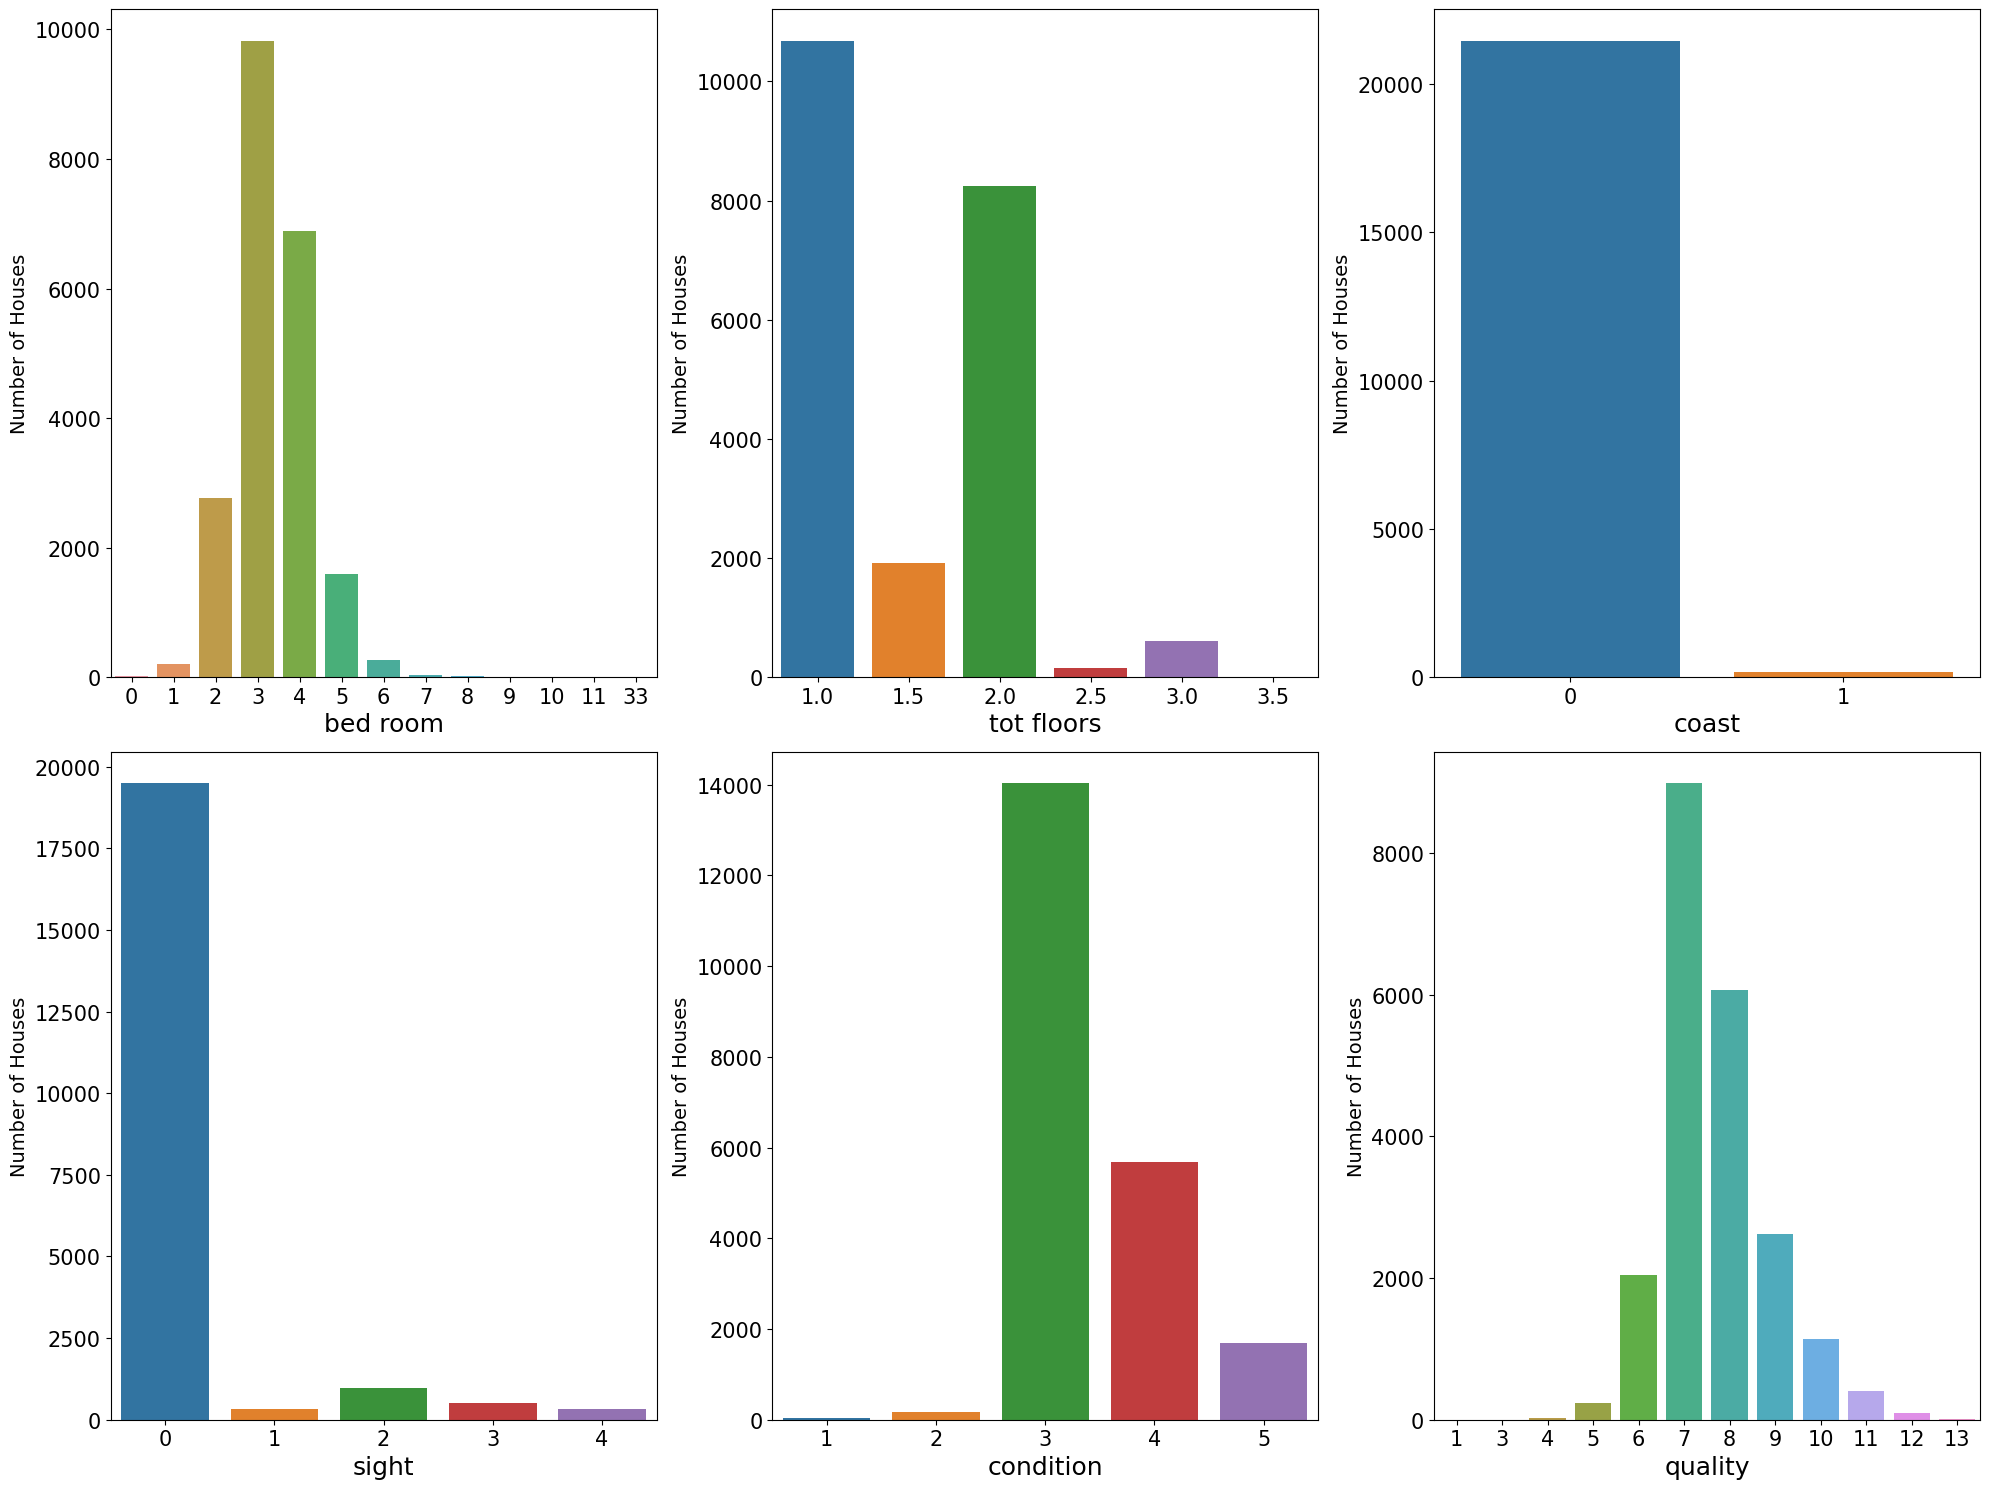

In [16]:
# features 
columns = ['bed room','tot floors','coast', 'sight', 'condition', 'quality'] 
# countplot
fig,ax = plt.subplots(2,3,figsize=(20,15))
for i in range(len(columns)):
    rows = i//3
    cols = i%3
    sns.countplot(data=df1,x=columns[i],ax=ax[rows,cols])
    ax[rows, cols].set_xlabel(columns[i], fontsize=18)
    ax[rows, cols].set_ylabel('Number of Houses', fontsize=14)
    ax[rows, cols].tick_params(axis='x', labelsize=15)
    ax[rows, cols].tick_params(axis='y', labelsize=15)
plt.tight_layout()

##### House Price Analysis

In [17]:
# 10 expensive houses
expensive_houses = df1.sort_values(by='price',ascending=False).head(10)
expensive_houses

sold date    price  bed room  bathroom  home area  lot area  \
16785 2014-10-13  7700000         6      8.00      12050     27600   
19888 2014-06-11  7060000         5      4.50      10040     37325   
264   2014-09-19  6890000         6      7.75       9890     31374   
20917 2014-08-04  5570000         5      5.75       9200     35069   
17618 2015-04-13  5350000         5      5.00       8000     23985   
5757  2015-04-13  5300000         6      6.00       7390     24829   
4789  2014-10-20  5110000         5      5.25       8010     45517   
668   2014-06-17  4670000         5      6.75       9640     13068   
1802  2014-08-15  4500000         5      5.50       6640     40014   
5907  2014-06-18  4490000         4      3.00       6430     27517   

       tot floors  coast  sight  condition  quality  ceil area  basement area  \
16785         2.5      0      3          4       13       8570           3480   
19888         2.0      1      2          3       11       7680           2360   
264           2.0      0      4          3       13       8860           1030   
20917         2.0      0      0          3       13       6200           3000   
17618         2.0      0      4          3       12       6720           1280   
5757          2.0      1      4          4       12       5000           2390   
4789          2.0      1      4          3       12       5990           2020   
668           1.0      1      4          3       12       4820           4820   
1802          2.0      1      4          3       12       6350            290   
5907          2.0      0      0          3       12       6430              0   

       yr_built  yr_renovated  zipcode      lat     long  living_measure15  \
16785      1910          1987    98102  47.6298 -122.323              3940   
19888      1940          2001    98004  47.6500 -122.214              3930   
264        2001             0    98039  47.6305 -122.240              4540   
20917      2001             0    98039  47.6289 -122.233              3560   
17618      2009             0    98004  47.6232 -122.220              4600   
5757       1991             0    98040  47.5631 -122.210              4320   
4789       1999             0    98033  47.6767 -122.211              3430   
668        1983          2009    98040  47.5570 -122.210              3270   
1802       2004             0    98155  47.7493 -122.280              3030   
5907       2001             0    98004  47.6208 -122.219              3720   

       lot_measure15  furnished  total_area  sold yr  
16785           8800          1       39650     2014  
19888          25449          1       47365     2014  
264            42730          1       41264     2014  
20917          24345          1       44269     2014  
17618          21750          1       31985     2015  
5757           24619          1       32219     2015  
4789           26788          1       53527     2014  
668            10454          1       22708     2014  
1802           23408          1       46654     2014  
5907           14592          1       33947     2014

In [18]:
# 10 cheapest houses
cheap_houses = df1.sort_values(by='price',ascending=True).head(10)
cheap_houses

sold date  price  bed room  bathroom  home area  lot area  tot floors  \
8196  2015-02-17  75000         1      0.00        670     43377         1.0   
1803  2014-05-06  78000         2      1.00        780     16344         1.0   
19252 2014-05-23  80000         1      0.75        430      5050         1.0   
5762  2015-03-24  81000         2      1.00        730      9975         1.0   
14275 2014-11-05  82000         3      1.00        860     10426         1.0   
3183  2014-05-08  82500         2      1.00        520     22334         1.0   
21470 2014-05-29  83000         2      1.00        900      8580         1.0   
7586  2015-04-30  84000         2      1.00        700     20130         1.0   
16146 2015-03-05  85000         2      1.00        910      9753         1.0   
15809 2014-09-15  85000         2      1.00        830      9000         1.0   

       coast  sight  condition  quality  ceil area  basement area  yr_built  \
8196       0      0          3        3        670              0      1966   
1803       0      0          1        5        780              0      1942   
19252      0      0          2        4        430              0      1912   
5762       0      0          1        5        730              0      1943   
14275      0      0          3        6        860              0      1954   
3183       0      0          2        5        520              0      1951   
21470      0      0          3        5        900              0      1918   
7586       0      0          3        6        700              0      1949   
16146      0      0          3        5        910              0      1947   
15809      0      0          3        6        830              0      1939   

       yr_renovated  zipcode      lat     long  living_measure15  \
8196              0    98022  47.2638 -121.906              1160   
1803              0    98168  47.4739 -122.280              1700   
19252             0    98014  47.6499 -121.909              1200   
5762              0    98168  47.4808 -122.315               860   
14275             0    98146  47.4987 -122.341              1140   
3183              0    98168  47.4799 -122.296              1572   
21470             0    98168  47.4727 -122.270              2060   
7586              0    98168  47.4752 -122.271              1490   
16146             0    98032  47.3897 -122.236              1160   
15809             0    98032  47.3813 -122.243              1160   

       lot_measure15  furnished  total_area  sold yr  
8196           42882          0       44047     2015  
1803           10387          0       17124     2014  
19252           7500          0        5480     2014  
5762            9000          0       10705     2015  
14275          11250          0       11286     2014  
3183           10570          0       22854     2014  
21470           6533          0        9480     2014  
7586           18630          0       20830     2015  
16146           7405          0       10663     2015  
15809           7680          0        9830     2014

In [19]:
# Average house prices by 'sold yr' and 'condition' of houses

df_sold=df1.pivot_table(index='sold yr',columns='condition',values='price',aggfunc='mean')
df_sold.rename_axis('Sold Year',inplace=True)
df_sold.columns = ['Condition-1','Condition-2','Condition-3','Condition-4','Condition-5']
df_sold

Condition-1    Condition-2    Condition-3    Condition-4  \
Sold Year                                                               
2014       277944.736842  311736.666667  539989.744524  521072.924903   
2015       432000.000000  350017.842857  546318.534889  521789.978381   

             Condition-5  
Sold Year                 
2014       611339.036776  
2015       616320.215130

# Data Preprocessing

##### Hands on Missing Values


In [20]:
# funcion for checking missing value
def missing_check(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    return missing_data
missing_check(df1)

Total  Percent
sold date             0      0.0
basement area         0      0.0
total_area            0      0.0
furnished             0      0.0
lot_measure15         0      0.0
living_measure15      0      0.0
long                  0      0.0
lat                   0      0.0
zipcode               0      0.0
yr_renovated          0      0.0
yr_built              0      0.0
ceil area             0      0.0
price                 0      0.0
quality               0      0.0
condition             0      0.0
sight                 0      0.0
coast                 0      0.0
tot floors            0      0.0
lot area              0      0.0
home area             0      0.0
bathroom              0      0.0
bed room              0      0.0
sold yr               0      0.0

Comment: No missing values observed in the dataset

##### Outliers Detection

In [21]:
# continuous features 
cont_feature = ['price','home area','lot area','ceil area','basement area','living_measure15','lot_measure15','total_area']

In [22]:
df1[cont_feature].describe().T

count           mean            std      min       25%  \
price             21613.0  540182.158793  367362.231718  75000.0  321950.0   
home area         21613.0    2079.899736     918.440897    290.0    1427.0   
lot area          21613.0   15106.967566   41420.511515    520.0    5040.0   
ceil area         21613.0    1788.390691     828.090978    290.0    1190.0   
basement area     21613.0     291.509045     442.575043      0.0       0.0   
living_measure15  21613.0    1986.552492     685.391304    399.0    1490.0   
lot_measure15     21613.0   12768.455652   27304.179631    651.0    5100.0   
total_area        21613.0   17186.867302   41589.081215   1423.0    7035.0   

                       50%       75%        max  
price             450000.0  645000.0  7700000.0  
home area           1910.0    2550.0    13540.0  
lot area            7618.0   10688.0  1651359.0  
ceil area           1560.0    2210.0     9410.0  
basement area          0.0     560.0     4820.0  
living_measure15    1840.0    2360.0     6210.0  
lot_measure15       7620.0   10083.0   871200.0  
total_area          9575.0   13000.0  1652659.0

Comment:  'basement area' have minimum value 0 which indicates some of the houses don't have basement.

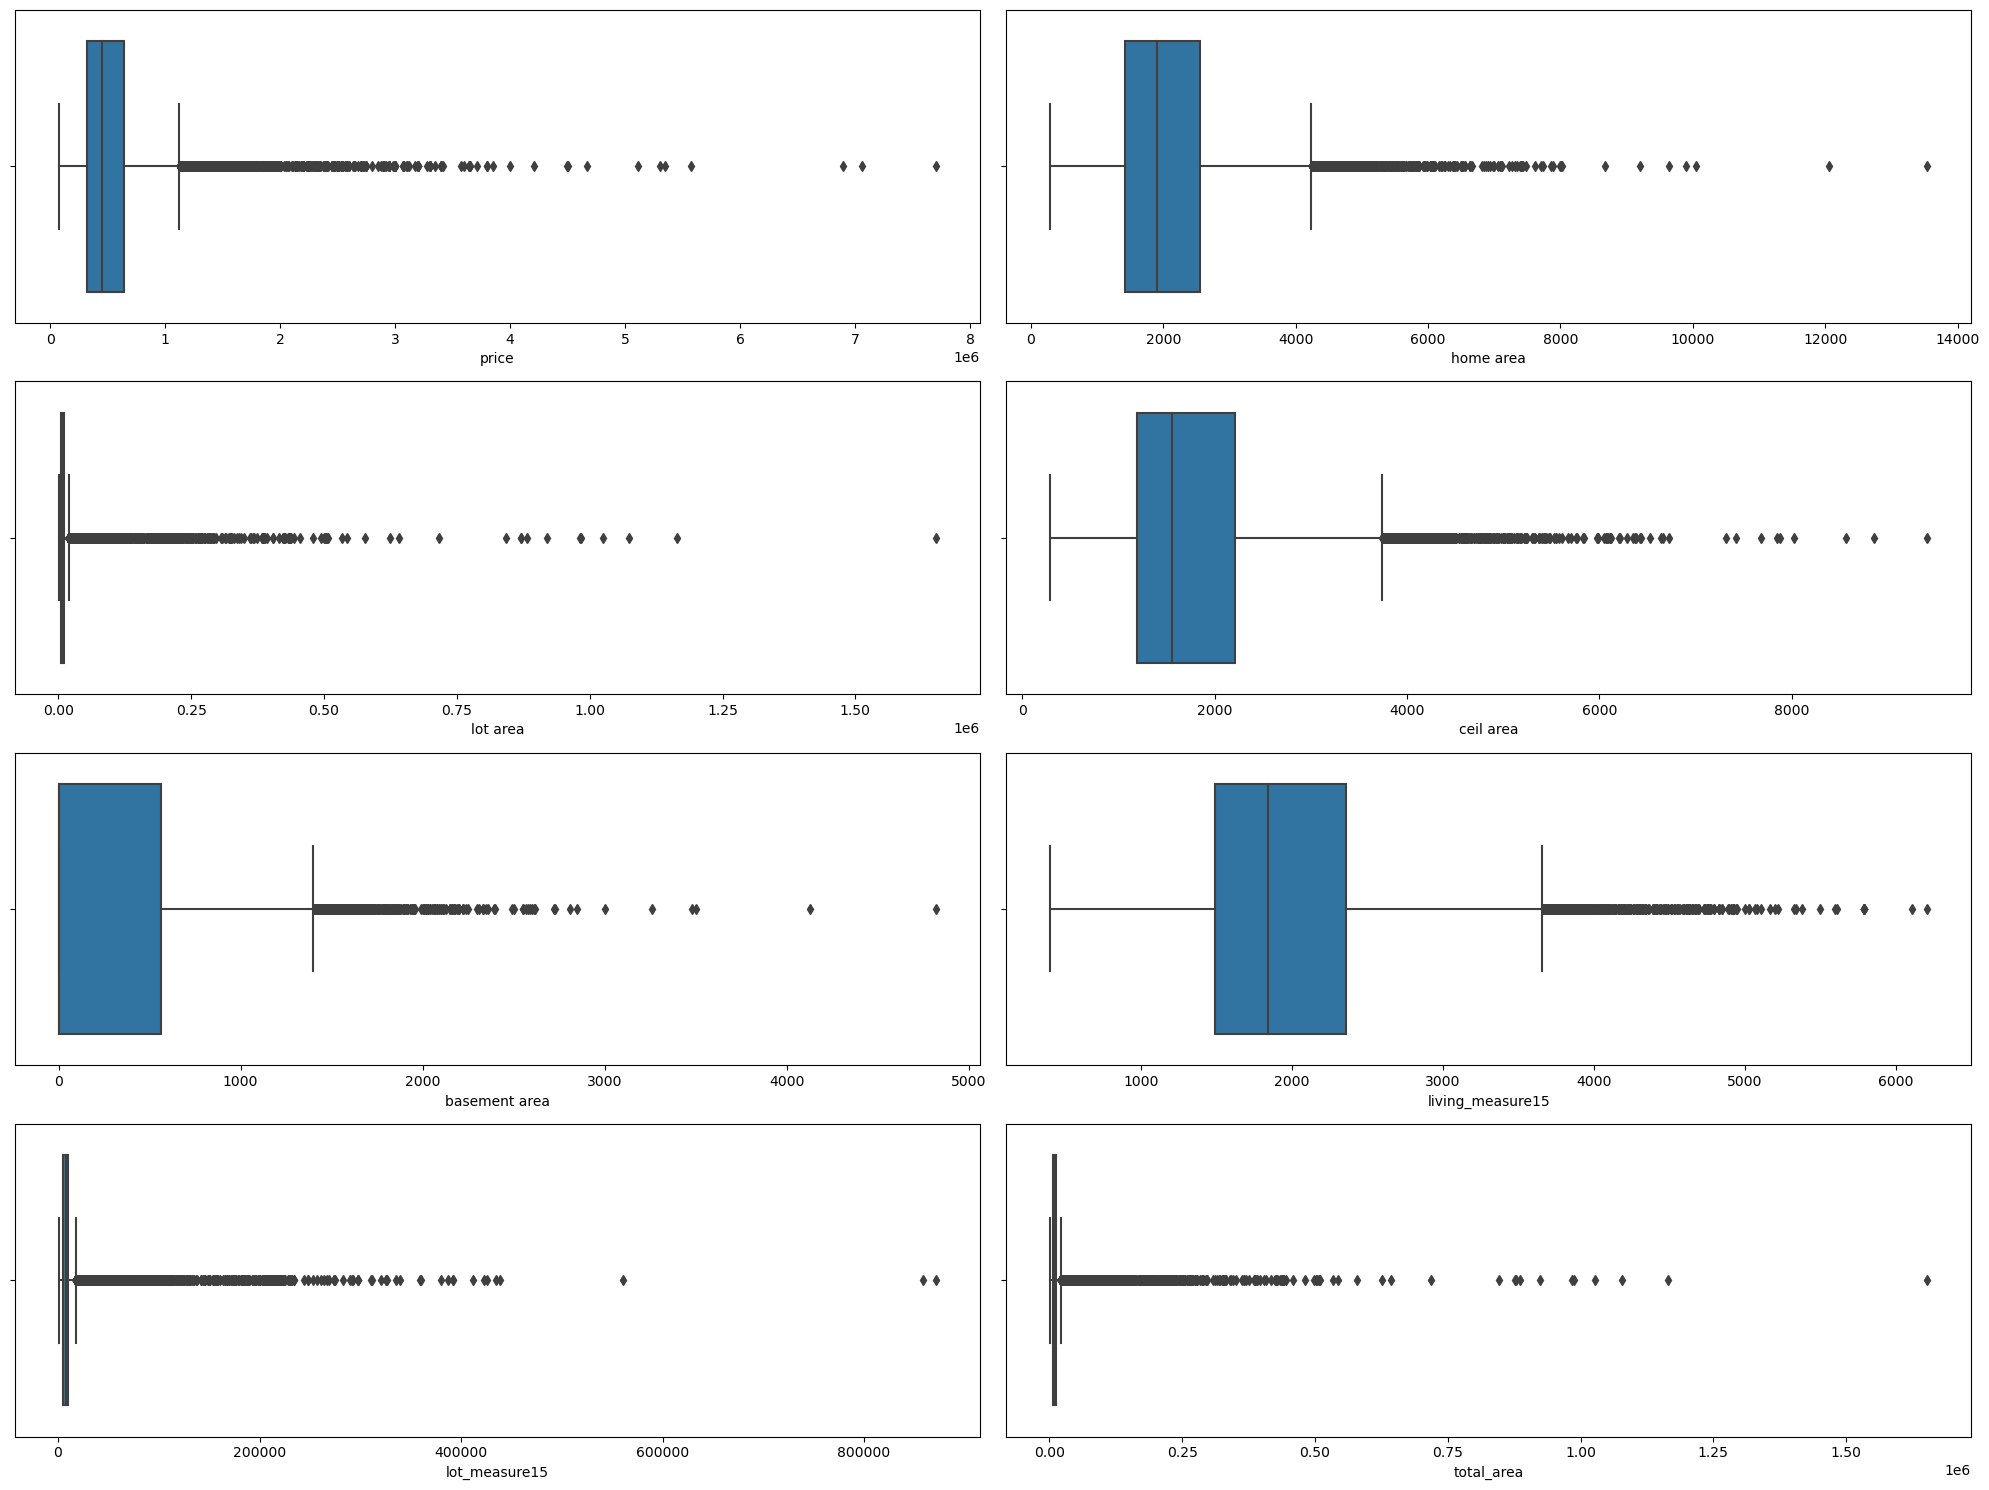

In [23]:
# boxplot for outlier detection
# boxplot on continuous features
fig,ax = plt.subplots(4,2,figsize=(20,15))
for i in range(len(cont_feature)):  
    rows = i//2
    cols = i%2
    boxplot = sns.boxplot(data=df1,x=cont_feature[i],ax=ax[rows,cols])
    plt.tight_layout()

##### Number of outliers of continuous features

In [24]:
# five number summary
# with upper whisker and lower whisker
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3-Q1
df_q = pd.DataFrame({'Q1': Q1.values,
                     'Q3': Q3.values,
                     'IQR': IQR.values},index=Q1.index)
up_whisk = Q3+1.5*IQR
low_whisk = Q1-1.5*IQR

In [25]:
for i in range(len(cont_feature)):
    counts = df1.loc[(df1[cont_feature[i]]>up_whisk[cont_feature[i]])| (df1[cont_feature[i]]<low_whisk[cont_feature[i]])].shape[0]
    if i==0:
        print('Number of Outliers')
    print(cont_feature[i],':',counts)

Number of Outliers
price : 1159
home area : 572
lot area : 2425
ceil area : 611
basement area : 496
living_measure15 : 544
lot_measure15 : 2194
total_area : 2419


In [26]:
# dropping outliers for 'price' column and store in new dataframe df2
df2 =df1.drop(df1[df1['price']>up_whisk[0]].index)
df2.shape

(20454, 23)

In [27]:
for i in range(len(cont_feature)):
    counts = df2.loc[(df2[cont_feature[i]]>up_whisk[cont_feature[i]])| (df2[cont_feature[i]]<low_whisk[cont_feature[i]])].shape[0]
    if i==0:
        print('Number of Outliers')
    print(cont_feature[i],':',counts)

Number of Outliers
price : 0
home area : 174
lot area : 2129
ceil area : 278
basement area : 298
living_measure15 : 238
lot_measure15 : 1903
total_area : 2083


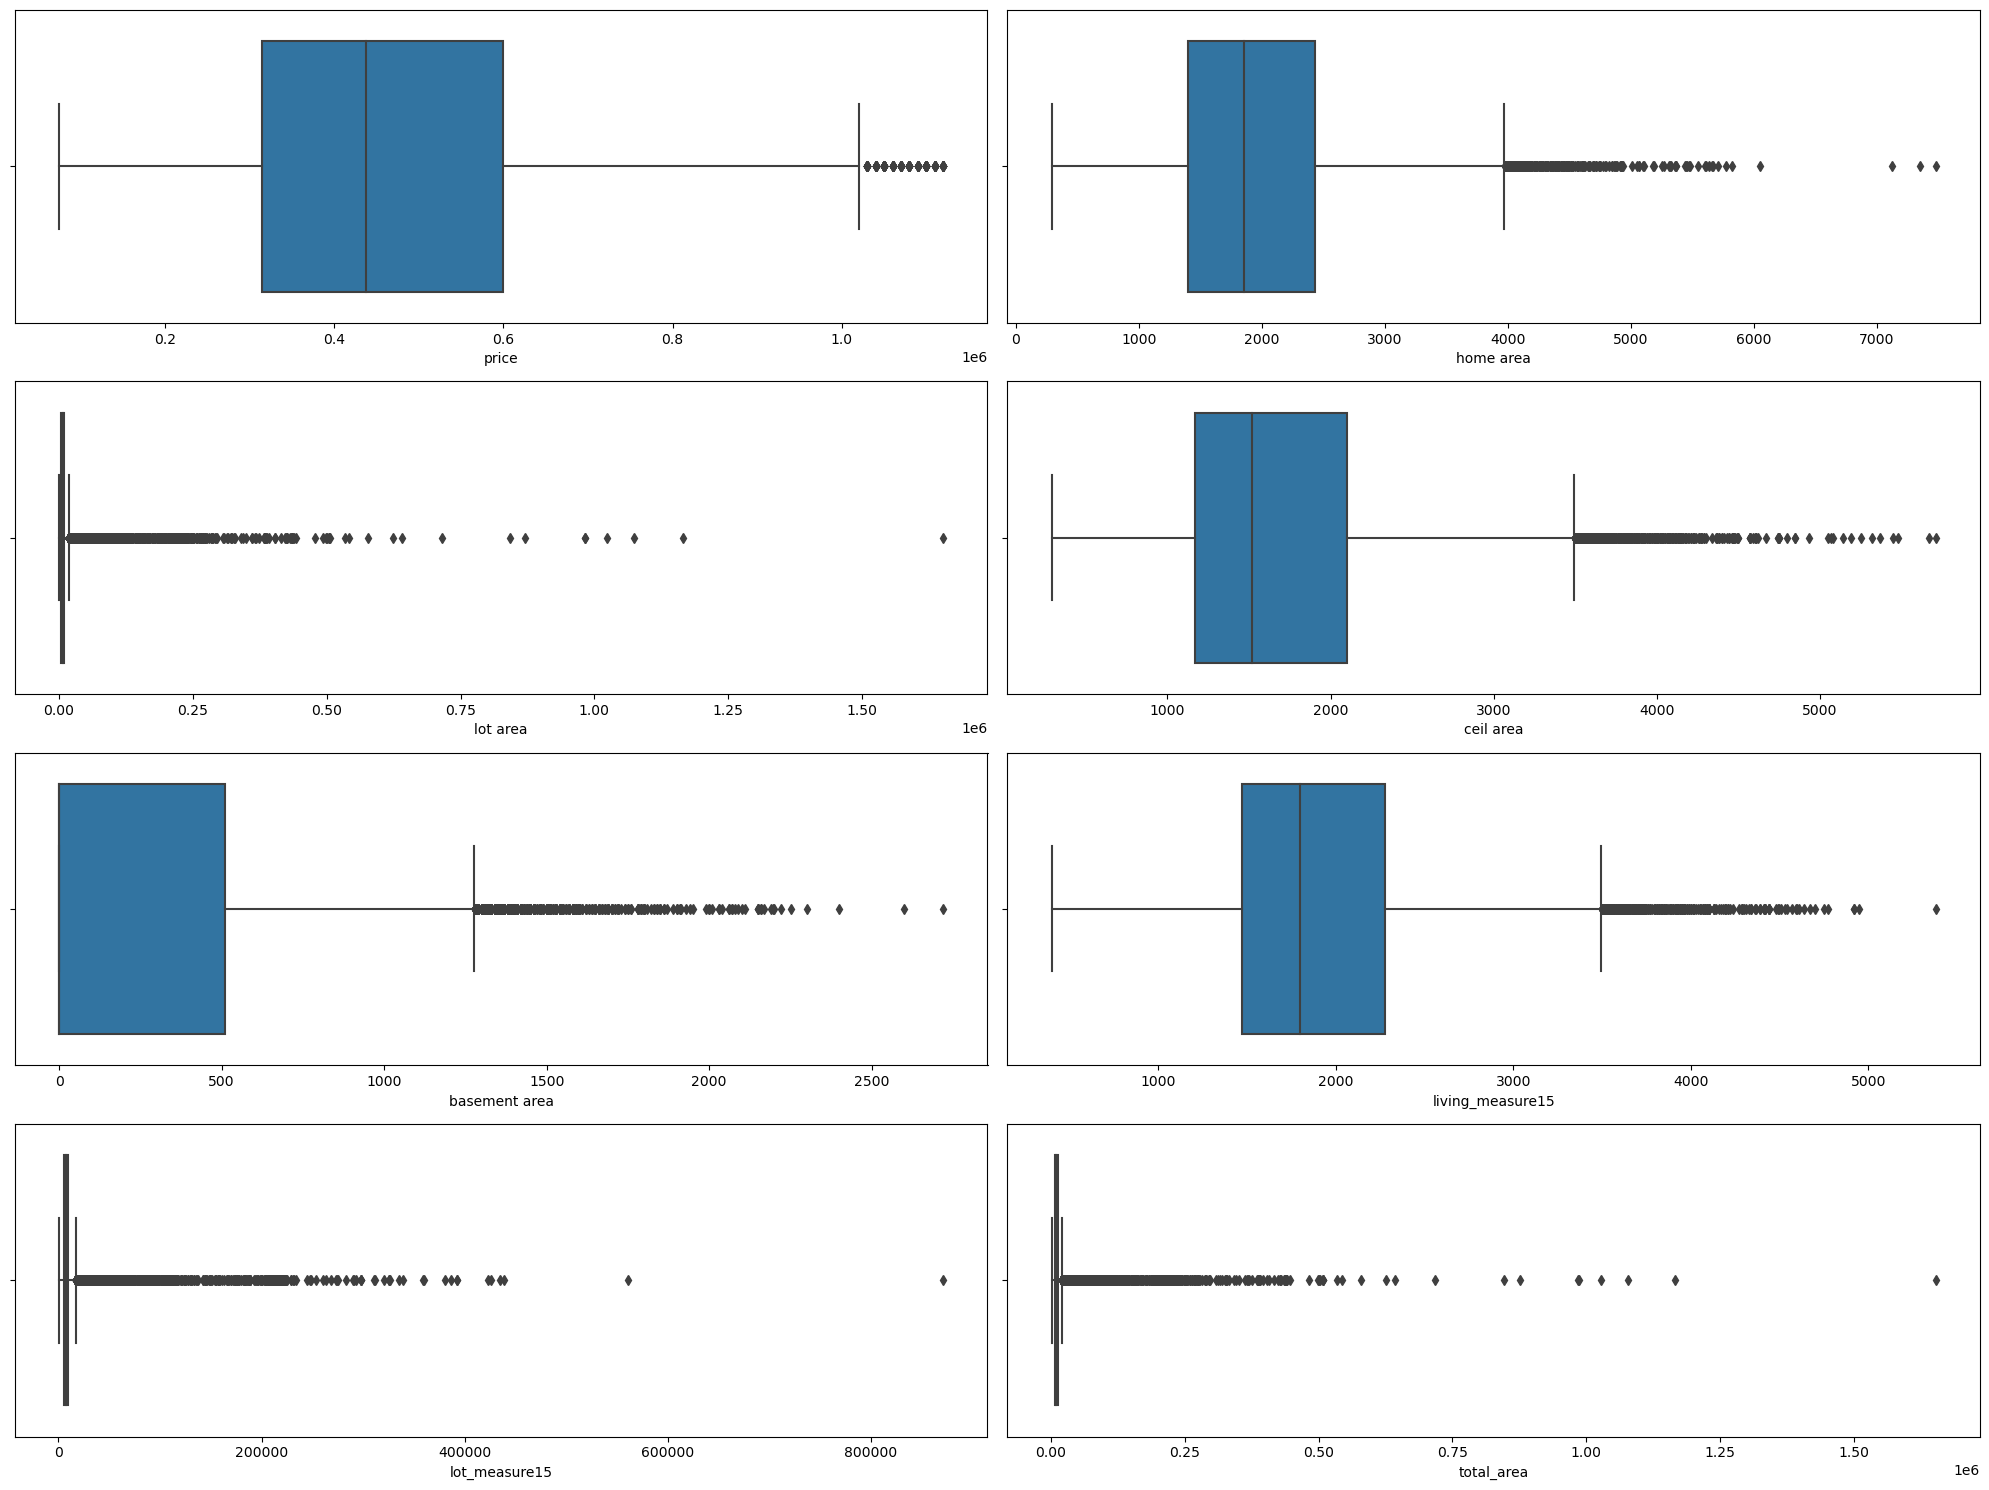

In [28]:
# boxplot on continuous features
fig,ax = plt.subplots(4,2,figsize=(20,15))
for i in range(len(cont_feature)):  
    rows = i//2
    cols = i%2
    boxplot = sns.boxplot(data=df2,x=cont_feature[i],ax=ax[rows,cols])
    plt.tight_layout()

Comment: Ignored these outliers and moved forward.

##### Pair Panel Analysis

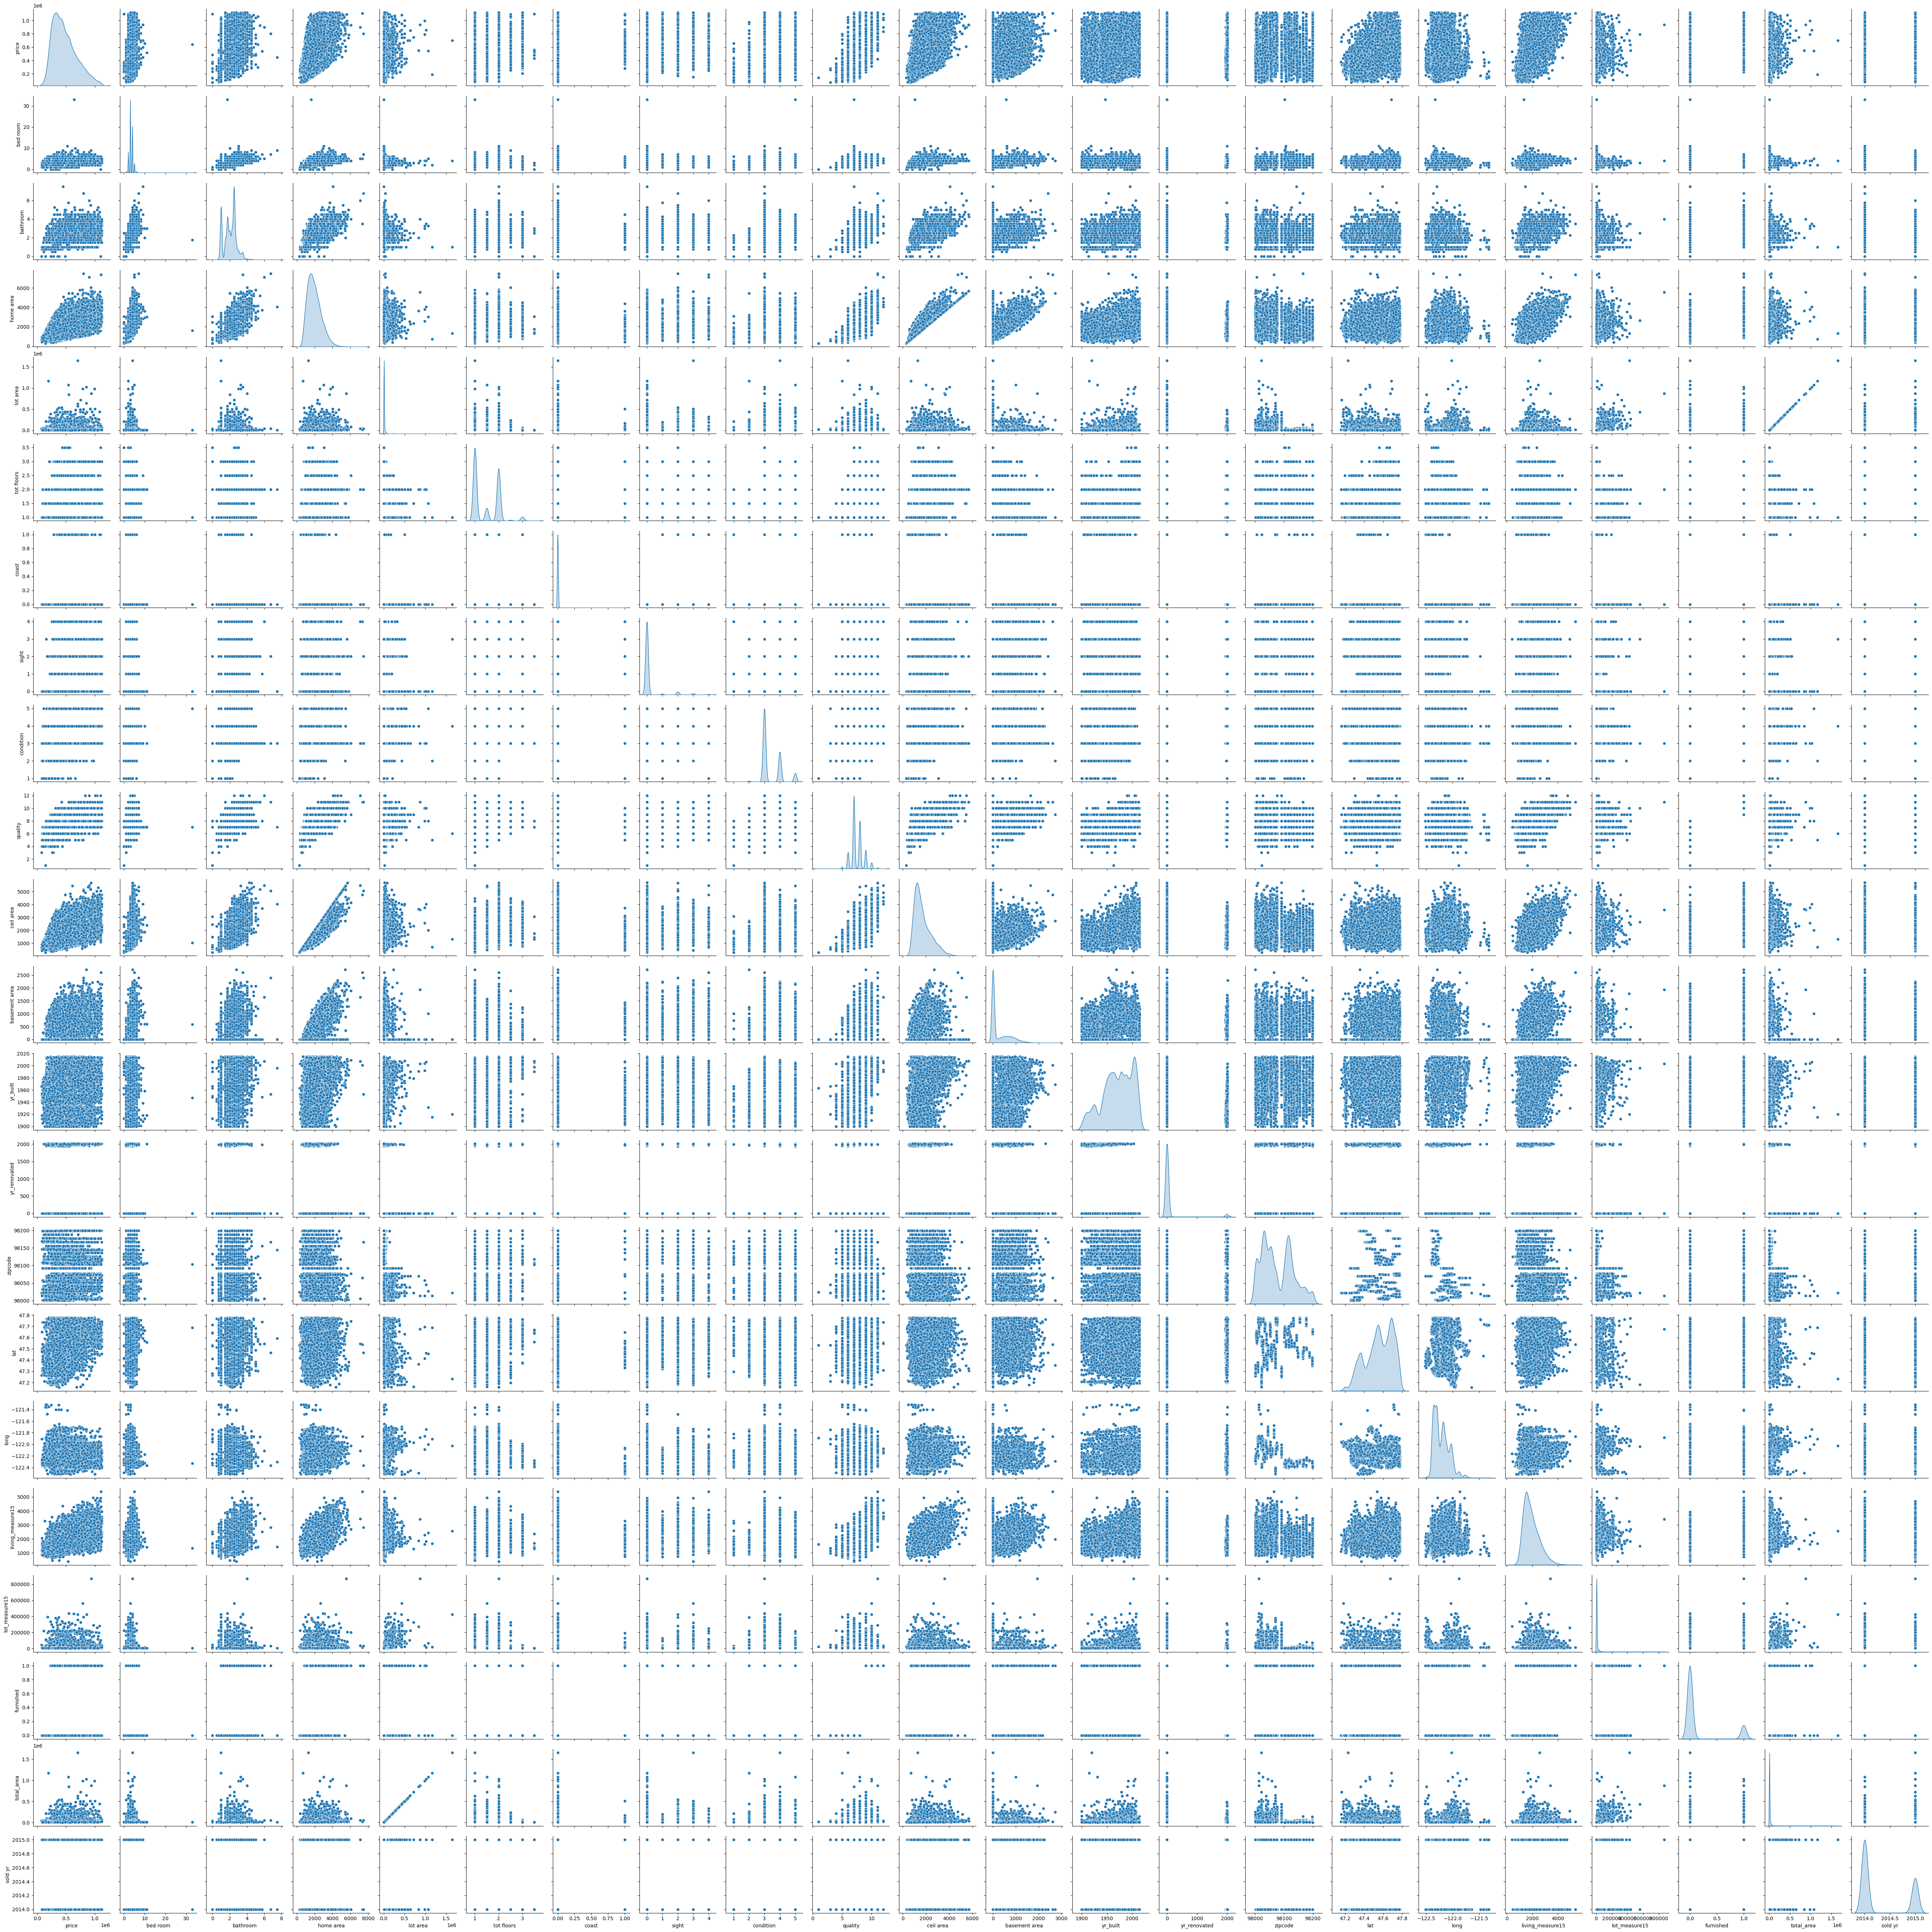

In [30]:
sns.pairplot(df2,diag_kind='kde')

##### Price vs others Scatter plot

In [31]:
# selecting columns for scatter analysis
col_names = df2.columns.drop('price')
col_names

Index(['sold date', 'bed room', 'bathroom', 'home area', 'lot area',
       'tot floors', 'coast', 'sight', 'condition', 'quality', 'ceil area',
       'basement area', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area',
       'sold yr'],
      dtype='object')

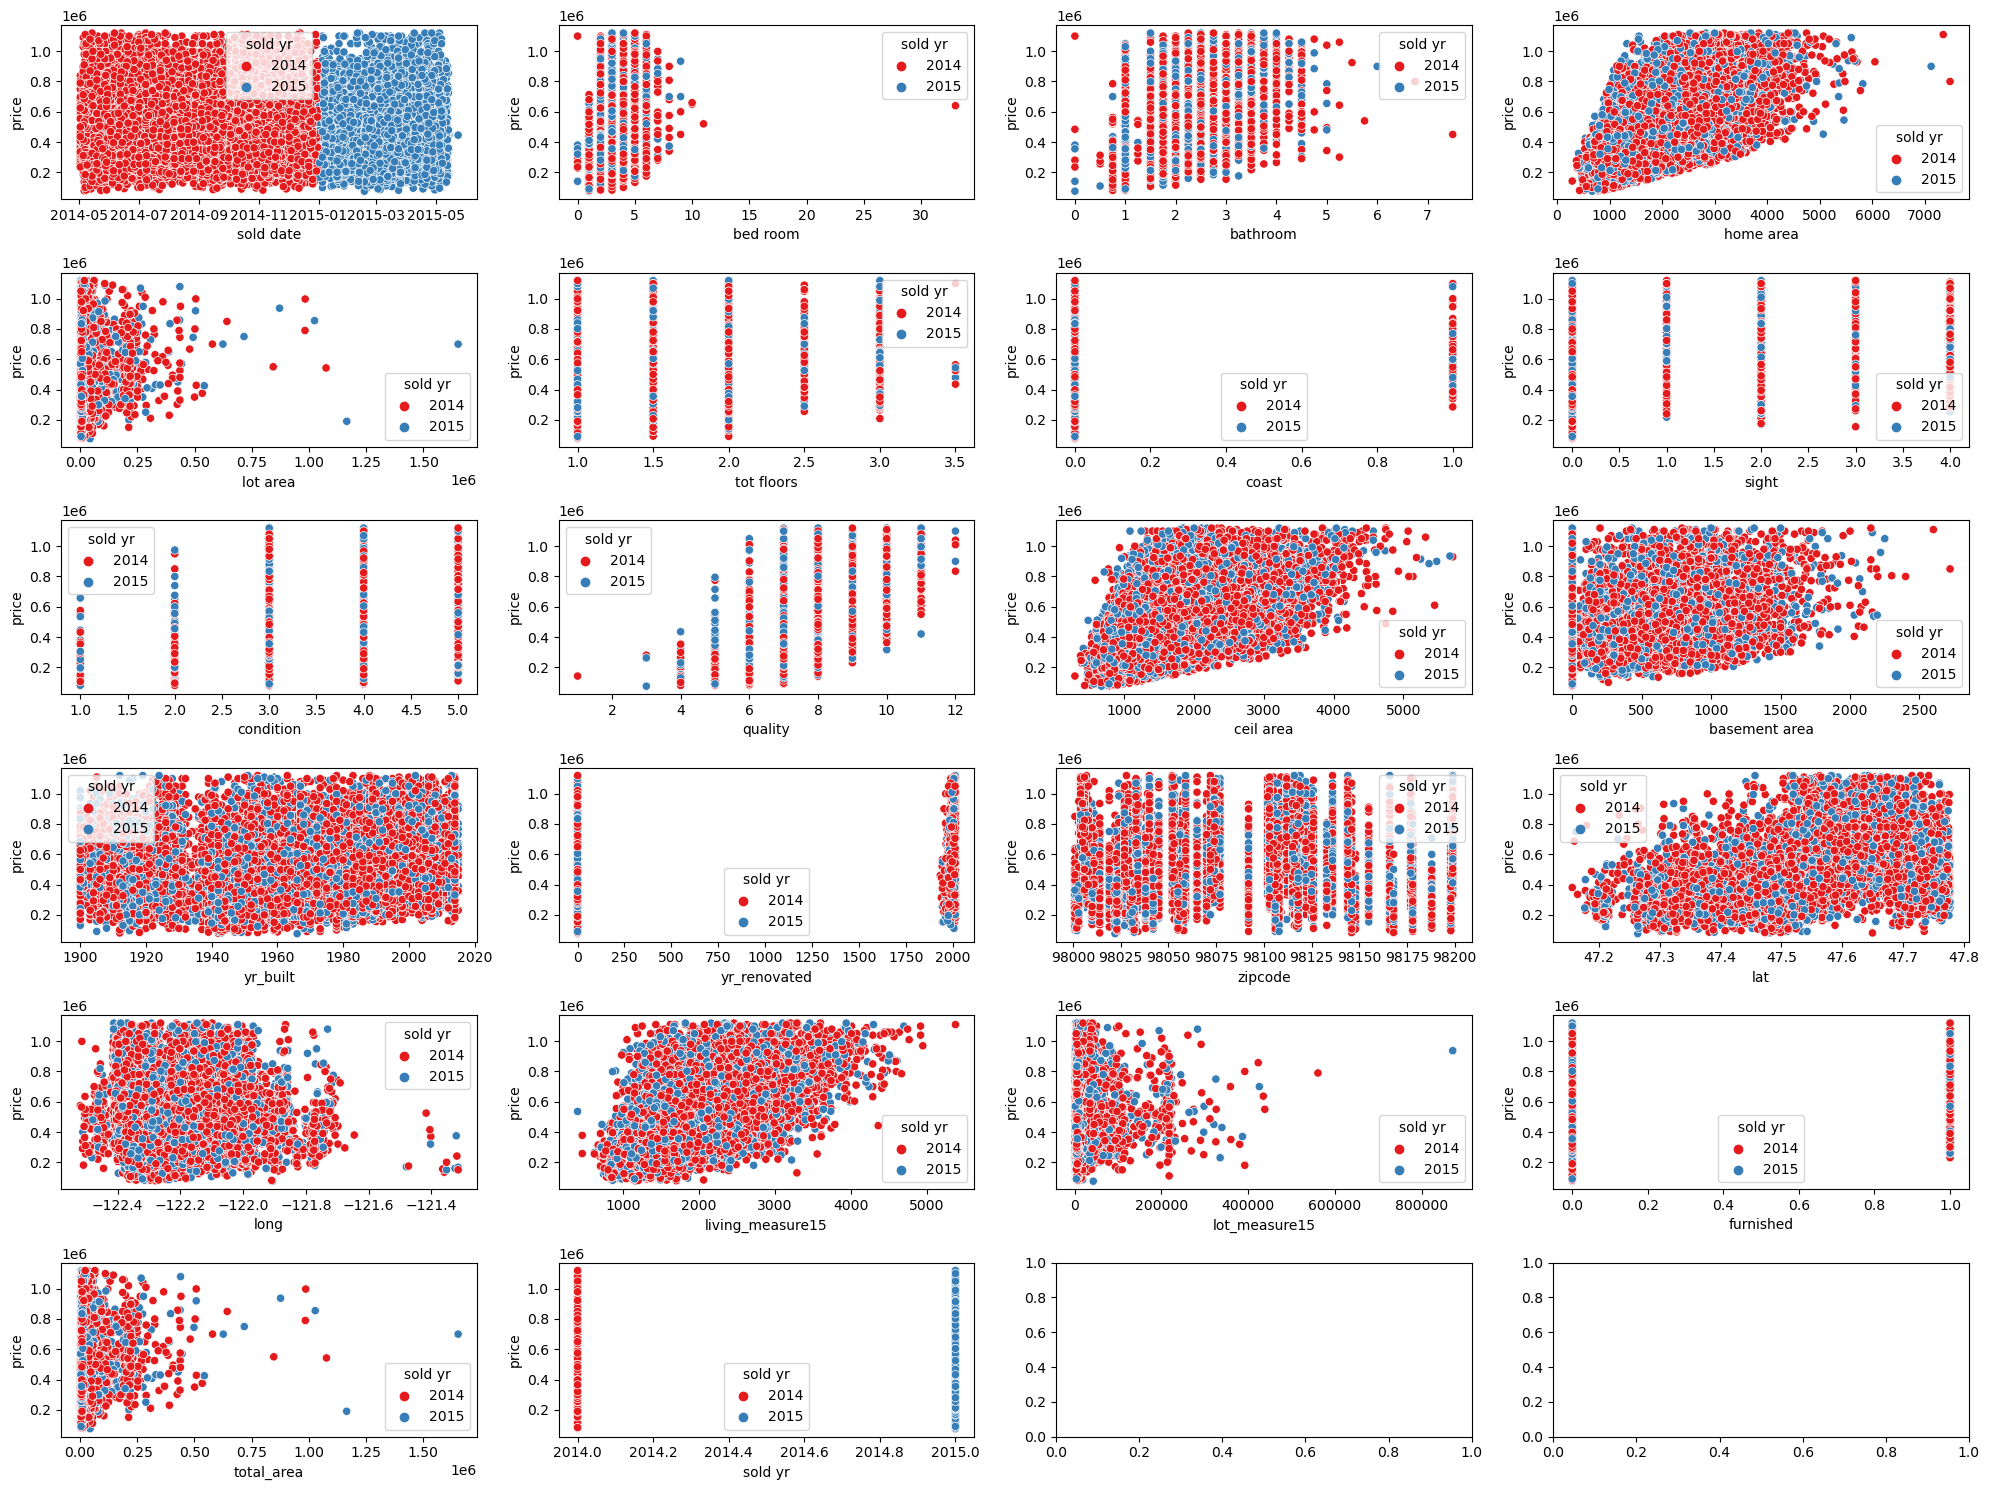

In [32]:
# price vs others scatter plot
fig,ax = plt.subplots(6,4,figsize=(20,15))
for i in range(len(col_names)):
    rows = i//4
    cols = i%4
    scatter = sns.scatterplot(y='price',x=col_names[i],data=df2,hue='sold yr',ax=ax[rows,cols],palette="Set1")
    plt.tight_layout()

##### Correlation between each other


In [33]:
# pearson correlation
corr = df2.corr()
corr

price  bed room  bathroom  home area  lot area  \
price             1.000000  0.294465  0.454631   0.621572  0.093158   
bed room          0.294465  1.000000  0.492077   0.583920  0.023829   
bathroom          0.454631  0.492077  1.000000   0.716240  0.064375   
home area         0.621572  0.583920  0.716240   1.000000  0.158285   
lot area          0.093158  0.023829  0.064375   0.158285  1.000000   
tot floors        0.273429  0.152710  0.500742   0.340550 -0.017475   
coast             0.051720 -0.030528 -0.003599   0.001908  0.024851   
sight             0.237358  0.037129  0.095779   0.167918  0.079008   
condition         0.037775  0.026703 -0.135634  -0.072309 -0.002977   
quality           0.630484  0.321105  0.614009   0.705150  0.092919   
ceil area         0.530193  0.462978  0.637879   0.853554  0.162041   
basement area     0.234009  0.282272  0.221734   0.375471  0.011515   
yr_built          0.061257  0.159577  0.543634   0.353844  0.042631   
yr_renovated      0.084237  0.004309  0.025925   0.021127  0.010807   
zipcode          -0.017963 -0.147109 -0.205917  -0.203827 -0.129900   
lat               0.431180 -0.028567 -0.008416   0.011485 -0.094884   
long              0.071335  0.137701  0.246863   0.285311  0.221609   
living_measure15  0.561994  0.370365  0.528446   0.737969  0.143148   
lot_measure15     0.081720  0.020436  0.064114   0.171790  0.709638   
furnished         0.520028  0.207609  0.407628   0.568953  0.110747   
total_area        0.104840  0.035009  0.077975   0.177052  0.999819   
sold yr           0.001770 -0.009332 -0.028873  -0.032176 -0.000028   

                  tot floors     coast     sight  condition   quality  \
price               0.273429  0.051720  0.237358   0.037775  0.630484   
bed room            0.152710 -0.030528  0.037129   0.026703  0.321105   
bathroom            0.500742 -0.003599  0.095779  -0.135634  0.614009   
home area           0.340550  0.001908  0.167918  -0.072309  0.705150   
lot area           -0.017475  0.024851  0.079008  -0.002977  0.092919   
tot floors          1.000000 -0.001707 -0.012684  -0.277951  0.456831   
coast              -0.001707  1.000000  0.294881   0.014158 -0.013208   
sight              -0.012684  0.294881  1.000000   0.034566  0.131904   
condition          -0.277951  0.014158  0.034566   1.000000 -0.167778   
quality             0.456831 -0.013208  0.131904  -0.167778  1.000000   
ceil area           0.528705 -0.005454  0.066809  -0.177947  0.709830   
basement area      -0.295570  0.013315  0.199171   0.179611  0.072735   
yr_built            0.511904 -0.038974 -0.066164  -0.353217  0.491919   
yr_renovated       -0.002551  0.059727  0.063076  -0.060195 -0.019587   
zipcode            -0.064338  0.044166  0.100962  -0.005869 -0.184279   
lat                 0.036625 -0.045912 -0.027362  -0.018135  0.085677   
long                0.135165 -0.059082 -0.076931  -0.100411  0.229694   
living_measure15    0.268361  0.004528  0.186440  -0.118135  0.670903   
lot_measure15      -0.021883  0.031164  0.076055   0.001425  0.101945   
furnished           0.324635 -0.006454  0.114877  -0.144212  0.749290   
total_area         -0.010853  0.024808  0.081990  -0.004362  0.106213   
sold yr            -0.021847 -0.007053  0.001399  -0.045295 -0.036182   

                  ceil area  basement area  yr_built  yr_renovated   zipcode  \
price              0.530193       0.234009  0.061257      0.084237 -0.017963   
bed room           0.462978       0.282272  0.159577      0.004309 -0.147109   
bathroom           0.637879       0.221734  0.543634      0.025925 -0.205917   
home area          0.853554       0.375471  0.353844      0.021127 -0.203827   
lot area           0.162041       0.011515  0.042631      0.010807 -0.129900   
tot floors         0.528705      -0.295570  0.511904     -0.002551 -0.064338   
coast             -0.005454       0.013315 -0.038974      0.059727  0.044166   
sight              0.066809       0.199171 -0.066164      0.063076 

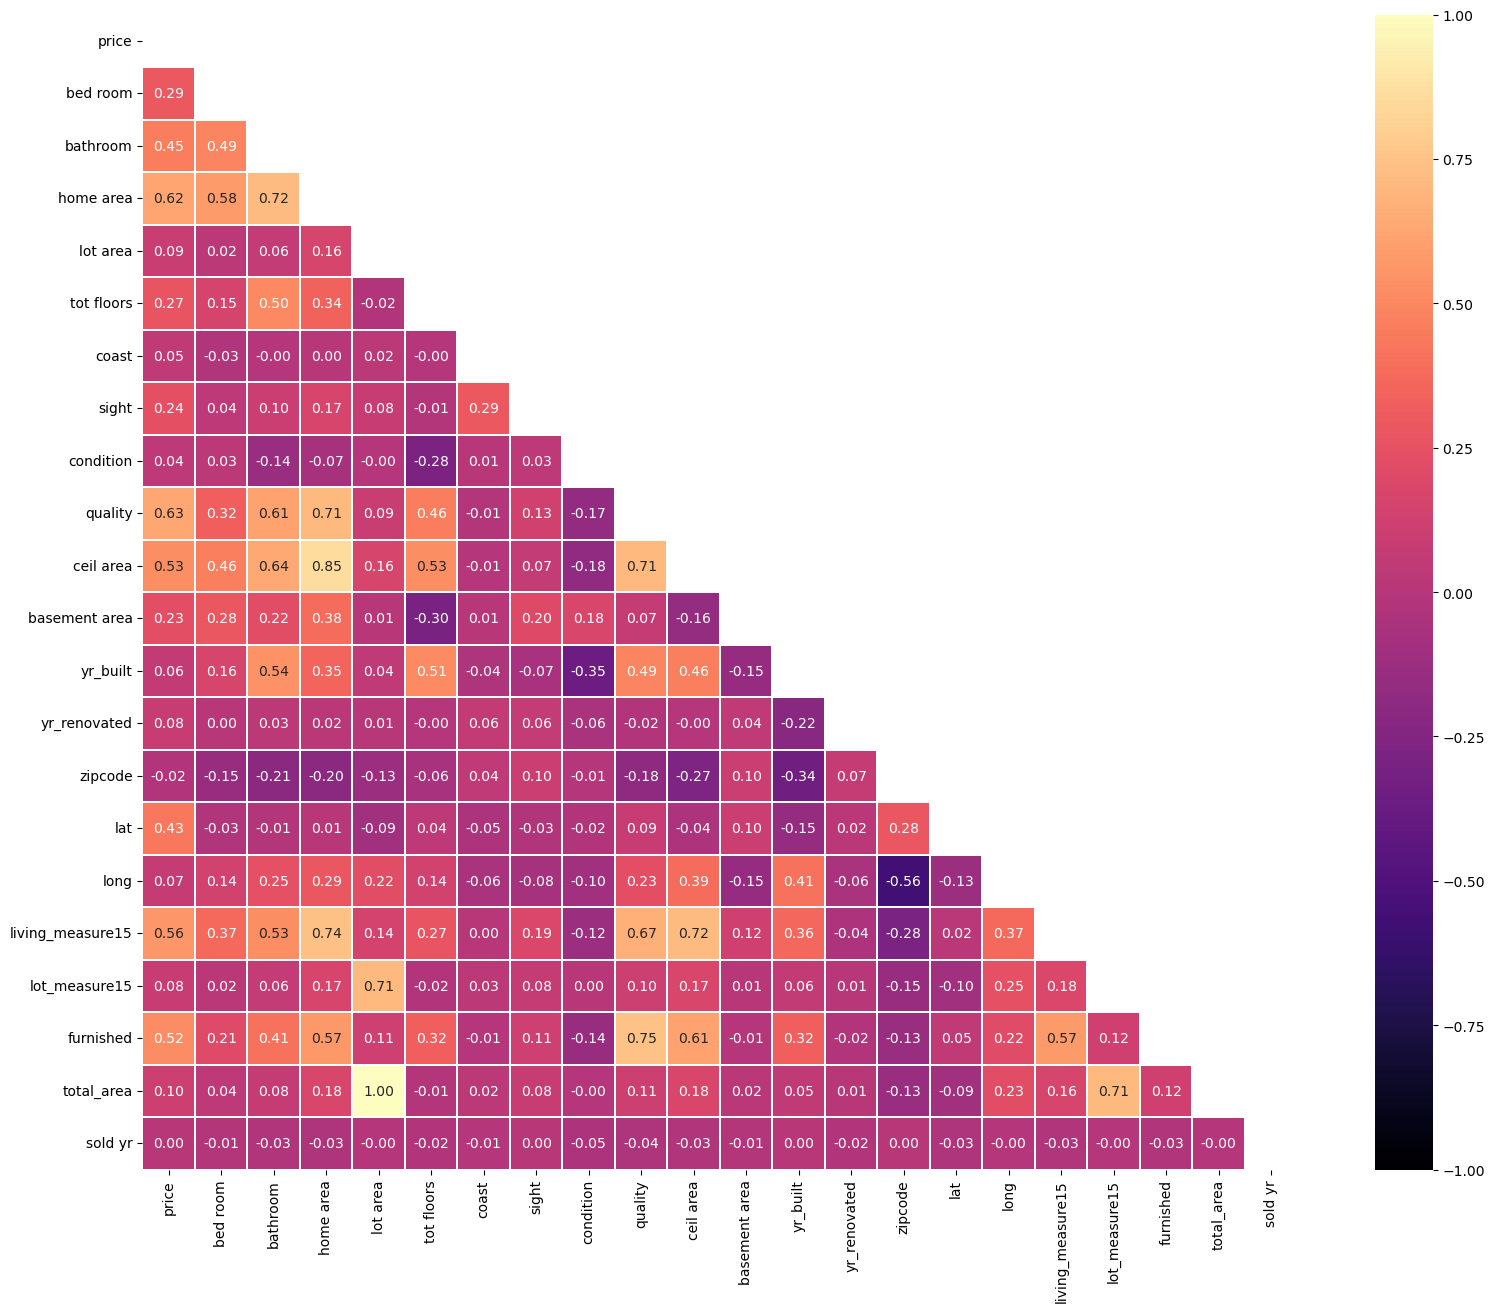

In [34]:
# correlation heatmap
mask = np.triu(np.ones_like(corr))
fig,ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap='magma',linewidths=0.05,fmt='.2f',vmax=1.0,vmin=-1,center=0.0,square=True,mask=mask)
plt.show()

In [35]:
# 1 vs price correlation
df2[col_names].corrwith(df2['price'])

bed room            0.294465
bathroom            0.454631
home area           0.621572
lot area            0.093158
tot floors          0.273429
coast               0.051720
sight               0.237358
condition           0.037775
quality             0.630484
ceil area           0.530193
basement area       0.234009
yr_built            0.061257
yr_renovated        0.084237
zipcode            -0.017963
lat                 0.431180
long                0.071335
living_measure15    0.561994
lot_measure15       0.081720
furnished           0.520028
total_area          0.104840
sold yr             0.001770
dtype: float64

Price has strong positive correlation with home area and quality  respectively 0.621 and 0.63.
There is no other features have good correlation with price.


##### Spliting up the Dataset

In [48]:
from sklearn.model_selection import train_test_split

X = df2.drop('price',axis=1)
y = df2['price']

X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.3,random_state=33)

print(X_train.shape,X_val.shape)
print(y_train.shape,y_val.shape)

(14317, 22) (6137, 22)
(14317,) (6137,)
